# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612/652, CS/IT 308 Machine Learning </center>
## <center> Lab#4 MMSE, Linear regression, and Logistic regression</center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='blue'> MMSE

---

Refer class note



## <font color='red'> 1. Find the minimum mean squared error (MMSE) on following data.

In [ ]:
y = [11,20,19,17,10]
y_bar = [12,18,19.5,18,9]
s = 0 
n=len(y)
for i in range (0,n):  
   diff= y[i] - y_bar[i]  
   x = diff**2 
   s = s + x 
MSE = s/n 
#write code here
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  1.45


## <font color='red'> 2 Given a sample space $S_{XY}={(0,0),(1,1),(2,2),(2,3)}$, with equiprobable outcomes, i.e., $p(0,0)=p(1,1)=p(2,2)=p(2,3)=\frac{1}{4}$. Estimate $\hat{Y}$ given X.


$$\hat{Y}=E(Y)+\frac{COV(X,Y)}{VAR(X)}(X-E(X))$$

Also calculate the mean squared error between $\hat{Y}$ and $Y$.


Hint: You can use the classnotes for help.

In [ ]:
#write code here
x=np.array([[0,0],[1,1],[2,2],[2,3]])
p=1/4
a=x[:,0]
b=x[:,1]
#Expectation of x
E_X=0
for i in range(0,4):
  E_X+=a[i]*p
print("E[X] \n",E_X)
#Expectation of y
E_Y=0
for i in range(0,4):
  E_Y+=b[i]*p
print("E[Y] \n",E_Y)
#Expectation of x^2
E_XX=0
for i in range(0,4):
  E_XX+=(a[i]**2)*p
print("E[X^2] \n",E_XX)
#Expectation of xy
E_XY=0
for i in range(0,4):
  E_XY+=(a[i]*b[i])*p
print("E[XY] \n",E_XY)
#variance of x
var_x=E_XX-(E_X**2)
print("variance of x \n",var_x)
#covariance of xy
cov=E_XY-((E_X)*(E_Y))
print("covariance of xy \n:",cov)
#y_bar
y_bar=[]
for i in range(0,4):
  y_bar.append(E_Y+(cov/var_x)*(i-E_X))
print("y_bar  : \n",y_bar)

E[X] 
 1.25
E[Y] 
 1.5
E[X^2] 
 2.25
E[XY] 
 2.75
variance of x 
 0.6875
covariance of xy 
: 0.875
y_bar  : 
 [-0.09090909090909083, 1.1818181818181819, 2.4545454545454546, 3.727272727272727]


## <font color='blue'> Linear regression

---

Refer class note



## <font color='red'> 3. Perform linear regression on the given dataset and observe underfitting and overfitting capacity of the function.

In [ ]:
#example of dataset:
no_samples = 10

#Generate n = np.random.rand(no_samples) # Here data is zero mean
n=np.random.rand(no_samples)
print(n)
#Generate x between 0 and 2 using number of smaples
x=np.linspace(0.0,2.0,num=no_samples)
print(x)
#Generate function y dependent on x and n: y = x**2+2*n
y = x**2+2*n
print(y)


[0.82513504 0.54582272 0.02030676 0.12228188 0.22228321 0.70396806
 0.1383668  0.53770012 0.48430434 0.74304723]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
[1.65027008 1.14102815 0.23814439 0.6890082  1.23468989 2.64250401
 2.05451139 3.49515332 4.12910251 5.48609446]


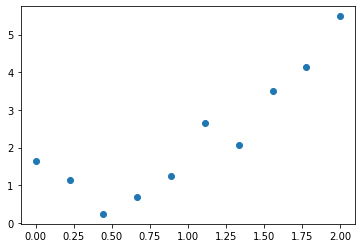

In [ ]:
# code to scatter plot x and y
plt.scatter(x, y)
plt.show()



#### Hint: Pseudo inverse
 $$Y = W^TX$$
 $$W = (X^TX)^{-1}X^TY$$ 

1. Take $y = \theta_0 + \theta_1 x$

In [ ]:
#Generate X1 by concatinating ones and x as shown in output
a=np.ones((10,1))
print(a.shape)
X1=np.concatenate((a,x.reshape(-1,1)),axis=1)


#Find W1 using pseudo inverse
print(X1)
x_t=np.transpose(X1)
#print(x_t.shape)
ss=np.dot(x_t,X1)
#print(ss.shape)
z=la.inv(ss)
b=np.dot(z,x_t)
W1=np.dot(b,y)
print(W1)

(10, 1)
[[1.         0.        ]
 [1.         0.22222222]
 [1.         0.44444444]
 [1.         0.66666667]
 [1.         0.88888889]
 [1.         1.11111111]
 [1.         1.33333333]
 [1.         1.55555556]
 [1.         1.77777778]
 [1.         2.        ]]
[0.16982405 2.10622659]


2. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4+\theta_5 x^5$

In [ ]:
#Generate X2 by concatinating ones,x,x**2,x**3,x**4,x**5 
x1=x.reshape(-1,1)
print(x1.shape)
x1_2=np.power(x1,2)
x1_3=np.power(x1,3)
x1_4=np.power(x1,4)
x1_5=np.power(x1,5)
X2=np.concatenate((a,x1,x1_2,x1_3,x1_4,x1_5),axis=1)

#Generate W2 using: W2= la.inv(X2.T@X2)@X2.T@y
x_t=np.transpose(X2)
#print(x_t.shape)
ss=np.dot(x_t,X2)
#print(ss.shape)
z=la.inv(ss)
b=np.dot(z,x_t)
W2=np.dot(b,y)
print(X2)
print(W2)

(10, 1)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.22222222e-01 4.93827160e-02 1.09739369e-02
  2.43865264e-03 5.41922810e-04]
 [1.00000000e+00 4.44444444e-01 1.97530864e-01 8.77914952e-02
  3.90184423e-02 1.73415299e-02]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e-01
  1.97530864e-01 1.31687243e-01]
 [1.00000000e+00 8.88888889e-01 7.90123457e-01 7.02331962e-01
  6.24295077e-01 5.54928957e-01]
 [1.00000000e+00 1.11111111e+00 1.23456790e+00 1.37174211e+00
  1.52415790e+00 1.69350878e+00]
 [1.00000000e+00 1.33333333e+00 1.77777778e+00 2.37037037e+00
  3.16049383e+00 4.21399177e+00]
 [1.00000000e+00 1.55555556e+00 2.41975309e+00 3.76406036e+00
  5.85520500e+00 9.10809667e+00]
 [1.00000000e+00 1.77777778e+00 3.16049383e+00 5.61865569e+00
  9.98872123e+00 1.77577266e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01]]
[ 1.72005913 -4.46253155  1.36916092  8.8

3. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 $

In [ ]:
#Generate X3 by concatinating ones,x,x**2 
X3=np.concatenate((a,x1,x1_2),axis=1)
#Generate W3 using: W2= la.inv(X3.T@X3)@X3.T@y
x_t=np.transpose(X3)
#print(x_t.shape)
ss=np.dot(x_t,X3)
#print(ss.shape)
z=la.inv(ss)
b=np.dot(z,x_t)
W3=np.dot(b,y)
print(X3)
print(W3)


[[1.         0.         0.        ]
 [1.         0.22222222 0.04938272]
 [1.         0.44444444 0.19753086]
 [1.         0.66666667 0.44444444]
 [1.         0.88888889 0.79012346]
 [1.         1.11111111 1.2345679 ]
 [1.         1.33333333 1.77777778]
 [1.         1.55555556 2.41975309]
 [1.         1.77777778 3.16049383]
 [1.         2.         4.        ]]
[ 1.34645208 -1.86489299  1.98555979]


[0.16982405 0.6378744  1.10592476 1.57397511 2.04202546 2.51007582
 2.97812617 3.44617652 3.91422688 4.38227723]
[1.72005913 0.87576761 0.51873588 0.70763472 1.29168035 2.03227038
 2.72461968 3.31939629 4.04435736 5.52598502]
[1.34645208 1.03008375 0.90982009 0.9856611  1.25760678 1.72565713
 2.38981216 3.25007185 4.30643622 5.55890525]


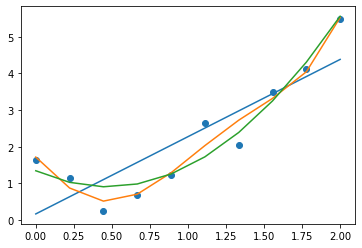

In [ ]:
fig = plt.figure()
plt.scatter(x,y)
y_p1 = np.dot(X1,W1)
print(y_p1)
y_p2 = np.dot(X2,W2)
print(y_p2)
y_p3 = np.dot(X3,W3)
print(y_p3)
plt.plot(x,y_p1)
plt.plot(x,y_p2)
plt.plot(x,y_p3)
plt.show()

## <font color='blue'> Brief about **Gradient descent**:
---


Given a system $Ax=b$, we find $x$ for given observations $b$ and coeffiecient matrix $A$. When $b$ is not in column space of $A$, then $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$.

<br>
Linear least square is one of the methods to estimate $x$ by minimizing the mean square error as, $\min ||Ax-b||_2$. This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>


We will solve this by applying gradient descent algortithm on $f(x)$. 
<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>


Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new x iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

##  <font color='blue'> Logistic regression

---
Cost funcion for logistic regression,
$$
\begin{aligned}
J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \cos t\left(h_{\theta}\left(x^{i}\right), y^{\prime}\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{i} \log h_{\theta}\left(x^{i}\right)+\left(1-y^{i}\right)\right.\log \left(1-\log \left(x^{i}\right)\right]\\
h(x)&=\frac{1}{1+e^{-\Theta^Tx}}
\end{aligned}
$$
So, using gradient descent
$$
\Theta_{i+1}=\Theta_{i}-\frac{\alpha}{m} \sum_{i=1}^{m}\left(h\left(x^{i} \Theta\right)-y^{i}\right)
$$
iterate till $$
\Theta_{i+1} \cong \Theta_{i}
$$




## <font color='red'> 4. Perform logistic regression on the dataset given below.
Here, to classify 2D data,
decision line can be given as,
$$\theta_0+\theta_1x+\theta_2y=0$$
Let, $$\Theta^T=\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{bmatrix}$$

In [ ]:
#Dataset example
X = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,1],[1,0,0],[1,1,0],[1,2,1],[1,3,1],[2,0,0],[2,1,1],[2,2,1],[2,3,1]])
Xb =X
print("x|y|class")
print(Xb)

x|y|class
[[0 0 0]
 [0 1 0]
 [0 2 0]
 [0 3 1]
 [1 0 0]
 [1 1 0]
 [1 2 1]
 [1 3 1]
 [2 0 0]
 [2 1 1]
 [2 2 1]
 [2 3 1]]


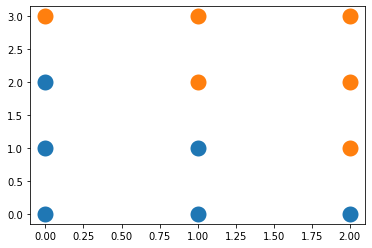

In [ ]:
#Generate scatter plot of X
uq = np.unique(X[:,-1])
for i in uq:
    cl1 = X[X[:,-1]==i]
    plt.scatter(cl1[:,0], cl1[:,1],linewidth=10)

In [ ]:
# Generate X by concatinating ones and X
a=np.ones((12,1))
print(X.shape)
b=X.reshape(-1,1)
X=np.concatenate((a,X),axis=1)
print(X)

(12, 3)
[[1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 2. 0.]
 [1. 0. 3. 1.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 2. 1.]
 [1. 1. 3. 1.]
 [1. 2. 0. 0.]
 [1. 2. 1. 1.]
 [1. 2. 2. 1.]
 [1. 2. 3. 1.]]


In [ ]:
y=Xb[:,1]
y

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [ ]:
#write code for gradient descent to find thetas
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta

m, n = np.shape(Xb)
numIterations= 100
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(Xb, y, theta, alpha, m, numIterations)
print(theta)

[0.89330867 0.88291859 0.94768684]


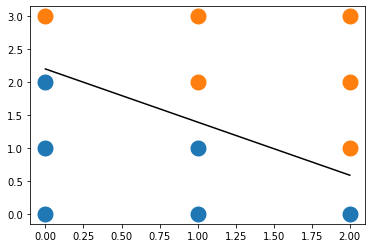

In [ ]:
#plot decision boundry 
a=np.ones((12,1))
theta = np.array([[-5.09963709],[ 1.86891016],[ 2.31806179]])
x=Xb[:,0]
x=x.reshape(-1,1)
x1_2=np.square(x)
X3=np.concatenate((a,x,x1_2),axis=1)
W3=la.inv(X3.T@X3)@X3.T@y
fig = plt.figure()
plt.scatter(x,y)
y_p3 = np.dot(X3,W3)
print(y_p3)
plt.plot(x,y_p3)
plt.show()